# **Descriptive Analytics Task**

## **1. Employee Attrition Analysis**

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

attrition1 = pd.read_csv("HR-Employee-Attrition.csv")
attrition2 = pd.read_csv("HR-Employee-Attrition.csv")
attrition3 = pd.read_csv("HR-Employee-Attrition.csv")
attrition1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [116]:
attrition_1 = (attrition1["Attrition"].value_counts(normalize=True) * 100) # Get the attrition distribution overview
attrition_overview = f"Attrition distribution overview: \n  {attrition_1}" # Get the percentag of the attrition distribution overview 
attrition_2 = attrition1.groupby("Department")["Attrition"].value_counts(normalize=True) * 100 # Get the attrition distribution by department
atrrition_by_dept = f"Attrrition by department: \n {attrition_2}"  # Get the attrition distribution by department
attrition_3 = attrition1.groupby("JobRole")["Attrition"].value_counts(normalize=True) * 100 # Get the attrition distribution by job role
attrition_by_jobrole = f"Attrition by job role: \n {attrition_3}" # Get the attrition distribution by job role

attrition1["Age"] = pd.cut(attrition1["Age"], bins=[0, 30, 40, 50, 60, 70], labels=["0-30", "31-40", "41-50", "51-60", "61-70"]) # Create age groups  for the attrition data  
attrition_4 = attrition1.groupby("Age")["Attrition"].value_counts(normalize=True).unstack() * 100 # Get the attrition distribution by age group
attrition_by_age = f"Attrition by age group: \n {attrition_4}" # Get the attrition distribution by age group    

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\807727551.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_4 = attrition1.groupby("Age")["Attrition"].value_counts(normalize=True).unstack() * 100 # Get the attrition distribution by age group


In [117]:
print(attrition_overview)
print(attrition_by_jobrole)

Attrition distribution overview: 
  Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64
Attrition by job role: 
 JobRole                    Attrition
Healthcare Representative  No           93.129771
                           Yes           6.870229
Human Resources            No           76.923077
                           Yes          23.076923
Laboratory Technician      No           76.061776
                           Yes          23.938224
Manager                    No           95.098039
                           Yes           4.901961
Manufacturing Director     No           93.103448
                           Yes           6.896552
Research Director          No           97.500000
                           Yes           2.500000
Research Scientist         No           83.904110
                           Yes          16.095890
Sales Executive            No           82.515337
                           Yes          17.484663
Sales Representative     

In [118]:
print(atrrition_by_dept)

Attrrition by department: 
 Department              Attrition
Human Resources         No           80.952381
                        Yes          19.047619
Research & Development  No           86.160250
                        Yes          13.839750
Sales                   No           79.372197
                        Yes          20.627803
Name: proportion, dtype: float64


In [119]:
print(attrition_by_age)

Attrition by age group: 
 Attrition         No        Yes
Age                            
0-30       74.093264  25.906736
31-40      86.268174  13.731826
41-50      89.440994  10.559006
51-60      87.412587  12.587413
61-70       0.000000   0.000000


### **1.1 Bar Plot: Attrition Rate by Department**
The Bar plot below shows that:
1. The Sales Department has the highest attrition rate among the three departments(slightly above 20%)
2. Reasearch & Development have the lowest attrition(within the range of 14% to 15%)
3. Overlapping Error between the bars for Sales and Human Resources suggests that the difference in attrition rates between the two departments might not be statistically significant. The obserevd difference might be due to random variation
3. The error bar for Research & Development does not overlap with the error bars of the other two departments. This implies tthe lower attrition rate is the real difference and not due to random variation(chance).

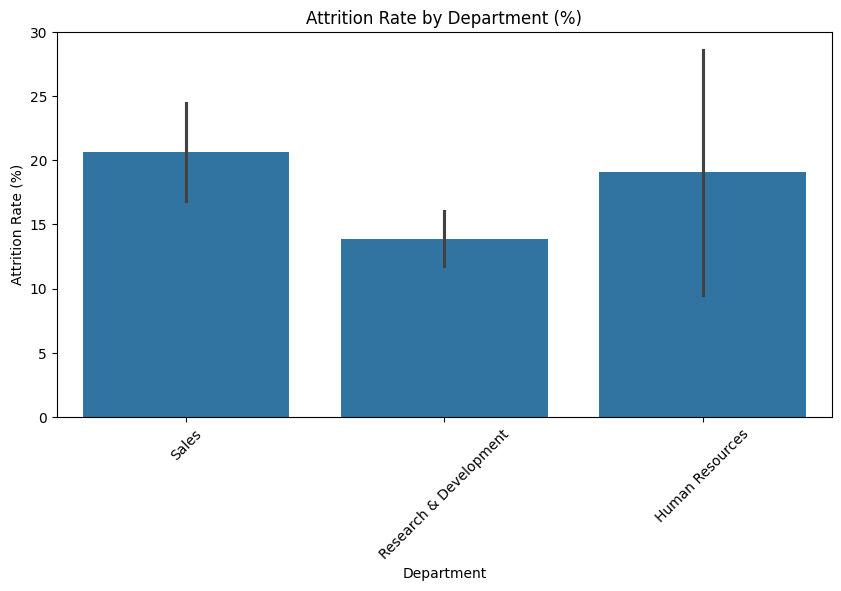

In [107]:
plt.figure(figsize=(10, 5))
sns.barplot(data=attrition1, x="Department", y=attrition1["Attrition"].apply(lambda x: 1 if x == "Yes" else 0), estimator=lambda x: sum(x) / len(x) * 100)
plt.title("Attrition Rate by Department (%)")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.show()


### **1.2 Bar Plot: Attrition Rate by Job Role**
The Bar Plot below shows that:
1. The Sales Representative JobRole shows a higher attrition rate compared to all other JobRoles. The sales executive JobRole aslo signifies a relative high attrition rate. This may suggest issues specific to the sales departments.
2. Low Attrition levels accross many JobRoles such as Manufacturing Director, HealthCare Representive e.t.c

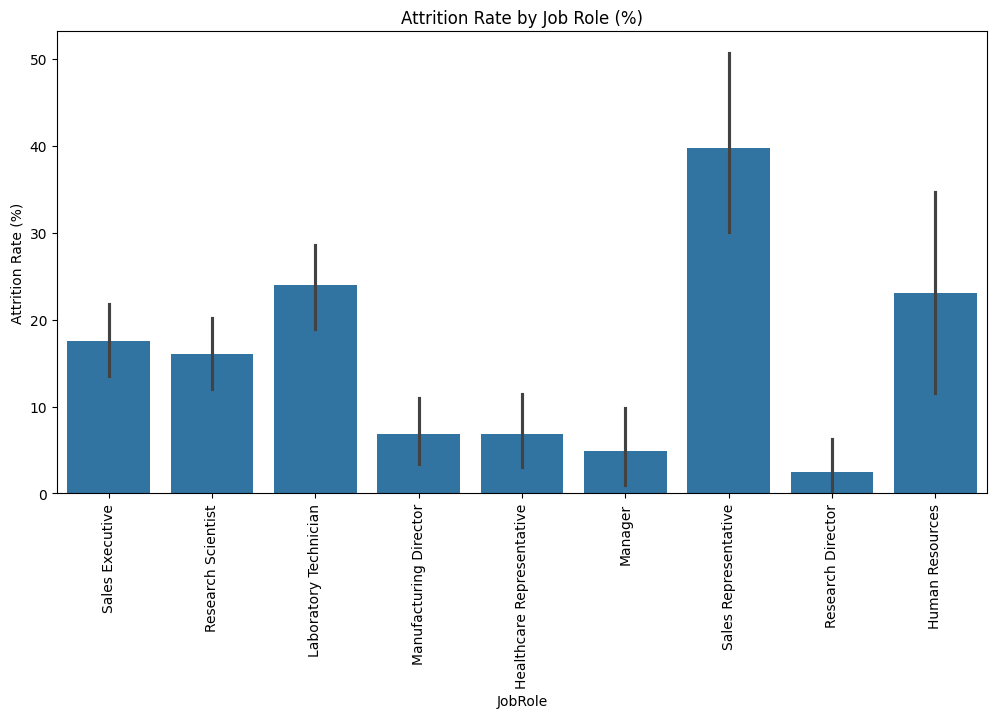

In [120]:
plt.figure(figsize=(12, 6))
sns.barplot(data=attrition1, x="JobRole", y=attrition1["Attrition"].apply(lambda x: 1 if x == "Yes" else 0), estimator=lambda x: sum(x) / len(x) * 100)
plt.title("Attrition Rate by Job Role (%)")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=90)
plt.show()


### **1.3 Bar Plot: Attrition Rate by Age Group**
The Bar Plot below shows that:
1. Youngest Age Group (0-30) exhibits the highest attrition rate than all other age groups. This suggests that younger employees are more likely to leave the company.
2. There's a declining trend in the attrition rates from the 0-30 group to 41-50 group, which indicates that as employee gets older, they are less likely to leave.
3. Age is a potential factor influencing attrition

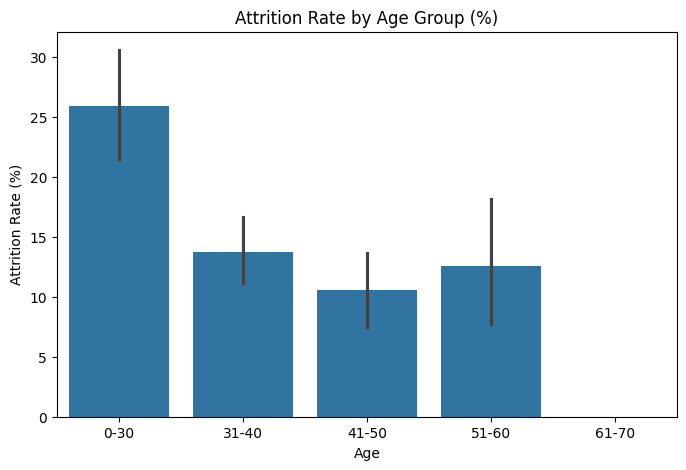

In [124]:
attrition2["Age"] = pd.cut(attrition2["Age"], bins=[0, 30, 40, 50, 60, 70], labels=["0-30", "31-40", "41-50", "51-60", "61-70"])

plt.figure(figsize=(8, 5))
sns.barplot(data=attrition2, x="Age", y=attrition2["Attrition"].apply(lambda x: 1 if x == "Yes" else 0), estimator=lambda x: sum(x) / len(x) * 100)
plt.title("Attrition Rate by Age Group (%)")
plt.ylabel("Attrition Rate (%)")
plt.show()


### **1.4 Distribution Plot: Age Distribution of Attrition**
This chart shows how the age of employees is related to whether they leave the company (attrition) or stay (non-attrition).



**Observations**:
1. In all age groups, the blue portion of the bars is significantly larger than the red portion. This indicates the number of employees who did not experiencce attrition is much higher than those who did in every age group.
2. Non-attrition peaks at 31-40 age group, suggesting the highest count of employees who did not experience attrition is within this age group.
3. The highest attrition is in the Younger groups, the red line suggests that the count of employees experiencing attrition is higher in the younger group(0-30 and 31-40).
4.  The chart suggests a relationship between age and attrition, with younger employees showing a higher tendency to leave the company.

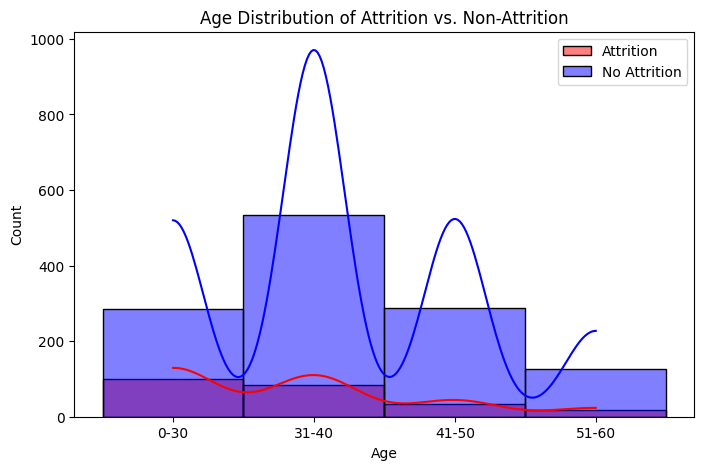

In [125]:
plt.figure(figsize=(8, 5))
sns.histplot(attrition1[attrition1["Attrition"] == "Yes"]["Age"], bins=20, kde=True, color="red", label="Attrition")
sns.histplot(attrition1[attrition1["Attrition"] == "No"]["Age"], bins=20, kde=True, color="blue", label="No Attrition")
plt.title("Age Distribution of Attrition vs. Non-Attrition")
plt.xlabel("Age")
plt.legend()
plt.show()


## **2. Salary and Performance Insights**

### **2.1 Correlation Analysis**

**Observaations**
1. Monthly Income vs. Performance Rating: The cell at the intersection of Monthly Income and Performance Rating shows a corrlation of -0.02, indicating a very weak negative correlation which suggests that there is no linear relatiosnhip between monthly income and performance rating. This indicates higher monthly income is not associated with better performance ratings.
2. Monthly Income vs Stock Option Level: The cell at the interesection of Monthly Income and Stock OPtion Level shows a correlation of 0.01, show a near zero correlation, indicating there's no linear relationship between Montly Income and Stock Opption Level.
3. Performance Rating vs. Stock Option Level: The cell at the intersection of Performanc eRating and Stock Option Level shows a correlation of 0.00, which indicate sno correlation between performance rating and stock option level. Performance rating is not strongly related to stock option level
4. No strong correlation between the three columns (variables0).

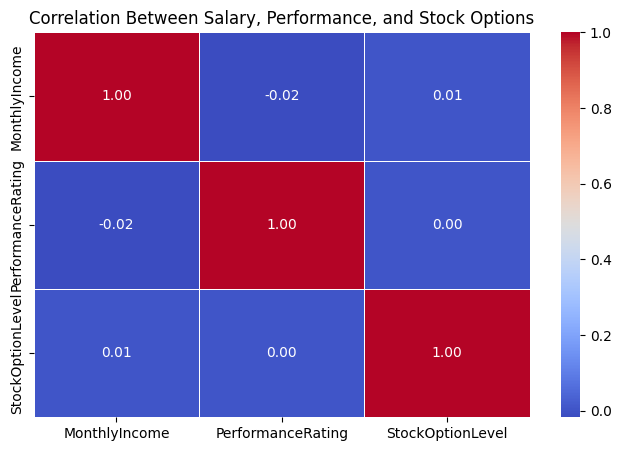

In [128]:
# Selecting relevant numeric columns
correlation_matrix = attrition3[["MonthlyIncome", "PerformanceRating", "StockOptionLevel"]].corr()

# Heatmap of correlation
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Salary, Performance, and Stock Options")
plt.show()

### **2.2 Box Plot: Salary vs. Performance rating**

**Observations**
1. The salaries seem to be similar across ratings, performance may not be strongly tied to salary.
2. Several high outliers are present in the performance rating(3), indicating some employees with this rating earn significantly more than the typical range.

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\2251084070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="PerformanceRating", y="MonthlyIncome", palette="coolwarm")


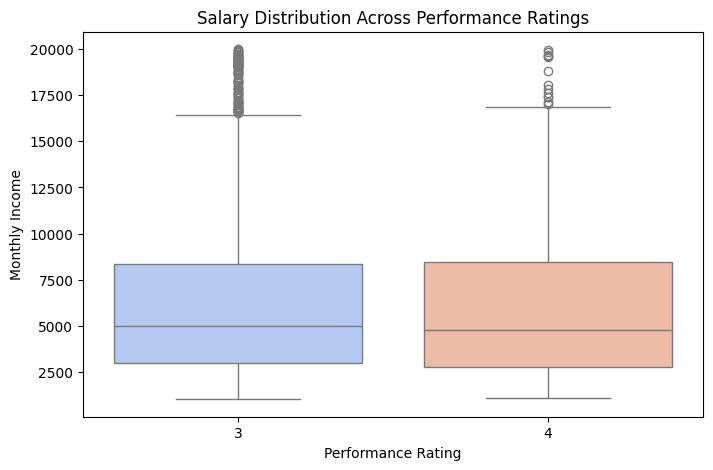

In [129]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=attrition3, x="PerformanceRating", y="MonthlyIncome", palette="coolwarm")
plt.title("Salary Distribution Across Performance Ratings")
plt.xlabel("Performance Rating")
plt.ylabel("Monthly Income")
plt.show()


### **2.3 Box Plot: Salary vs. Stock Option Levels**

**Observation**
The chart suggests a positive relationship between stock option level and salary. Higher stock option levels tend to be associated with higher median salaries.

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\2333798951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="StockOptionLevel", y="MonthlyIncome", palette="coolwarm")


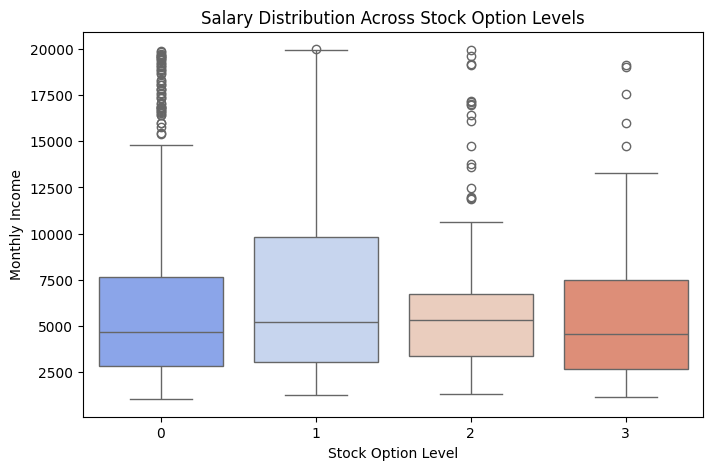

In [131]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=attrition3, x="StockOptionLevel", y="MonthlyIncome", palette="coolwarm")
plt.title("Salary Distribution Across Stock Option Levels")
plt.xlabel("Stock Option Level")
plt.ylabel("Monthly Income")
plt.show()


### **2.4 Salary Disparity by Gender**

**Observations**
1. The median lines within the boxes for both genders are very close. This suggests that the median salaries fro both genders are quite similar.
2. High outliers in both genders, indicating that some individuals in both groups earn signifcantly more than the typical range.

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\227476356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="Gender", y="MonthlyIncome", palette="Set2")


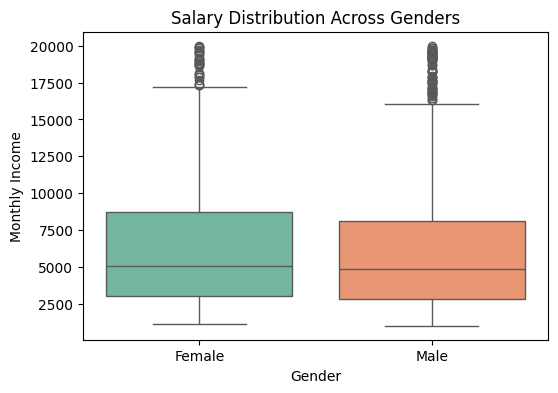

Gender
Female    6686.566327
Male      6380.507937
Name: MonthlyIncome, dtype: float64

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=attrition3, x="Gender", y="MonthlyIncome", palette="Set2")
plt.title("Salary Distribution Across Genders")
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()


attrition3.groupby("Gender")["MonthlyIncome"].mean()  # Calculate the average salary by Gender


### **2.5 Salary Differences by JobRole**

**Observations**
1. Salaries vary significantly across different JobRoles
2. Research Director and Manager JobRoles exhibit the highest median salary, with Research Director coming in second.
3. Sales Executive, HealthCare Reps and Research Scientis exhibit a moderate median salary
4. Lower Salaries: Laboratory technicians(lower median salary), Sales Reps(Lowest mdeian salary) and Human Resources(Low median salary)
5. The caht indicates a strong relationship between JobRoles and salary level.

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\2398026055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="JobRole", y="MonthlyIncome", palette="coolwarm")


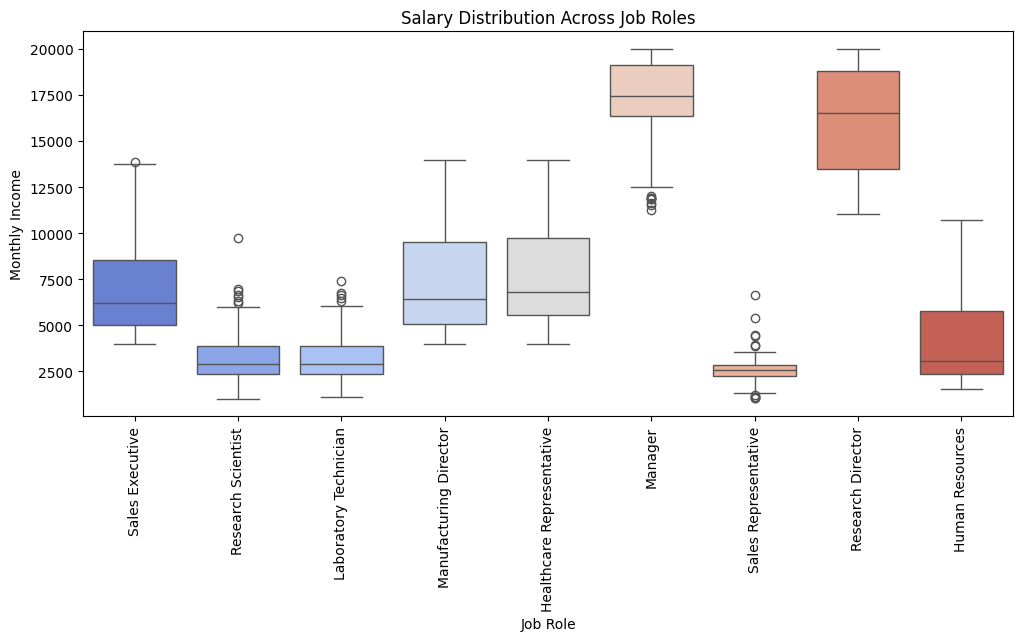

In [134]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=attrition3, x="JobRole", y="MonthlyIncome", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Salary Distribution Across Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.show()

## **3. Work Life Balance Ratings Across Departments and Job levels**

### **3.1 Work Life Balance by Department**

**Observations**
1. The chart reveals variations in work life balance ratings across departments.
2. Sales and R&D have similar median work life balance ratings(around the range of 2.5 to 3)
3. No department shows exceptionally high  or low work life balance compared to others
4. Human Resources have more inconsistent experiences, while Sales and R&D seem more stable


C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\3922383247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="Department", y="WorkLifeBalance", palette="coolwarm")


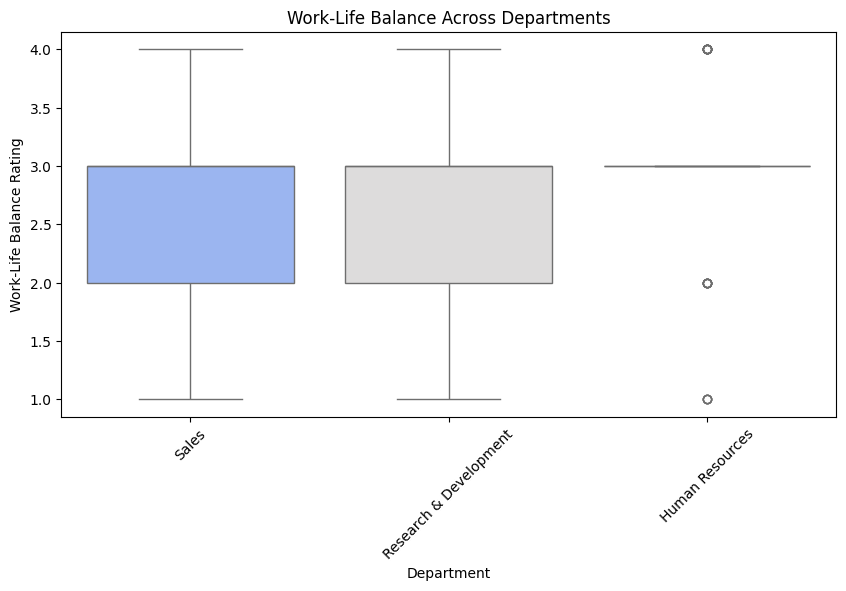

In [135]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=attrition3, x="Department", y="WorkLifeBalance", palette="coolwarm")
plt.title("Work-Life Balance Across Departments")
plt.xlabel("Department")
plt.ylabel("Work-Life Balance Rating")
plt.xticks(rotation=45)
plt.show()

### **3.2 Work Life Balance by Job Level**

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\4058062807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="JobLevel", y="WorkLifeBalance", palette="coolwarm")


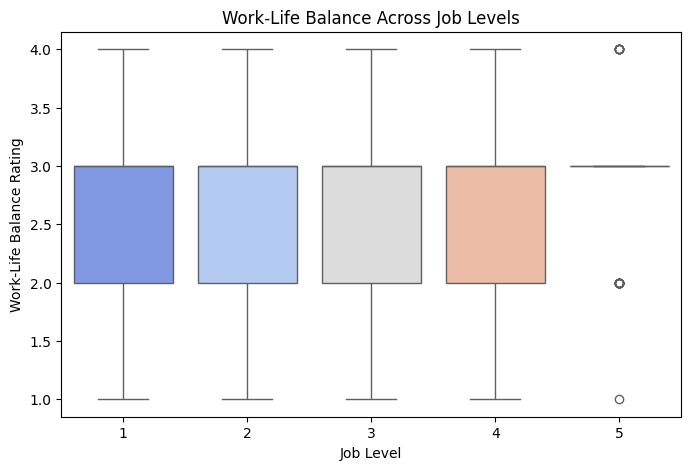

In [136]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=attrition3, x="JobLevel", y="WorkLifeBalance", palette="coolwarm")
plt.title("Work-Life Balance Across Job Levels")
plt.xlabel("Job Level")
plt.ylabel("Work-Life Balance Rating")
plt.show()


###  **3.3 Work Life Balance and Attrition**

There's no major difference in work-life balance between those who left and those who stayed.
The ratings for both groups range from 1 to 4
Work-life balance does not appear to be a strong predictor of attrition on its own.

C:\Users\ayemi\AppData\Local\Temp\ipykernel_31440\660592241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=attrition3, x="Attrition", y="WorkLifeBalance", palette="coolwarm")


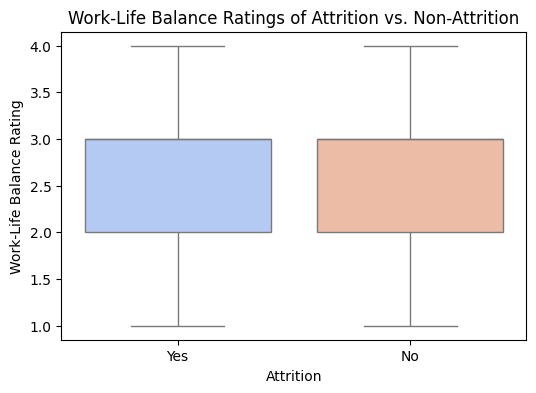

In [138]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=attrition3, x="Attrition", y="WorkLifeBalance", palette="coolwarm")
plt.title("Work-Life Balance Ratings of Attrition vs. Non-Attrition")
plt.xlabel("Attrition")
plt.ylabel("Work-Life Balance Rating")
plt.show()


### Correlation Between Work Life Balance and Attrition

In [139]:
# Convert Attrition to numeric (Yes = 1, No = 0) for correlation
attrition3["Attrition_Numeric"] = attrition3["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Compute correlation
correlation = attrition3["WorkLifeBalance"].corr(attrition3["Attrition_Numeric"])
print(f"Correlation between Work-Life Balance and Attrition: {correlation:.2f}")


Correlation between Work-Life Balance and Attrition: -0.06
